In [1]:
import os

import chi
import chi.library
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

from model import define_hamberg_model, define_hamberg_population_model

In [1]:
# Define model
model = chi.library.ModelLibrary().one_compartment_pk_model()
model.set_administration(compartment='central', direct=False)

NameError: name 'chi' is not defined

In [3]:
# Define parameters
parameters = [0, 0, 10, 2, 0.1]

# Define dosing regimen
dose = 5
period = 24

# Simulate concentration for dose durations
times = np.linspace(0, 96, 500)
model.set_dosing_regimen(dose=dose, start=0, period=period)
out1 = model.simulate(parameters=parameters, times=times)[0]

model.set_dosing_regimen(dose=dose, start=0, period=period, duration=6)
out2 = model.simulate(parameters=parameters, times=times)[0]

model.set_dosing_regimen(dose=dose, start=0, duration=12, period=period)
out3 = model.simulate(parameters=parameters, times=times)[0]

model.set_dosing_regimen(dose=dose, start=0, duration=24, period=period)
out4 = model.simulate(parameters=parameters, times=times)[0]

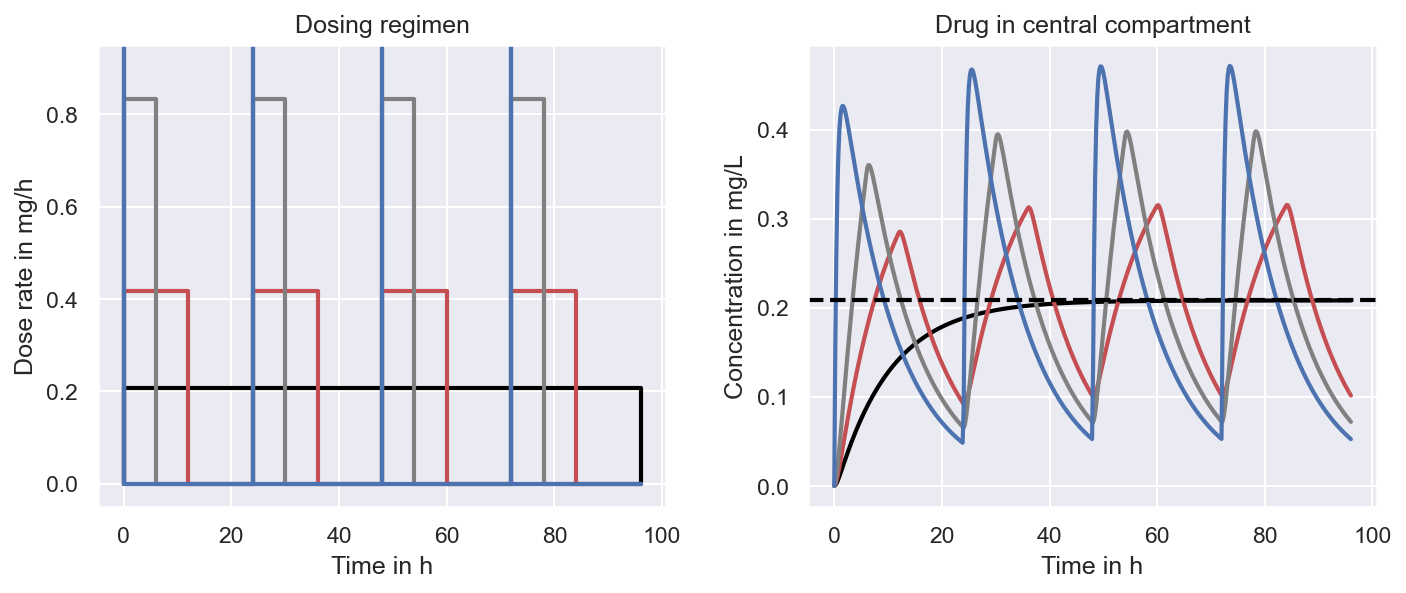

In [4]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, wspace=0.25)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

# Plot constant dose rate
axes[0].plot([0, 0, 96, 96], [0, dose/24, dose/24, 0], color='black', linewidth=2)
axes[1].plot(times, out4, color='black', linewidth=2)

# Plot infusion 2
axes[0].plot([0, 0, 12, 12, 24, 24, 36, 36, 48, 48, 60, 60, 72, 72, 84, 84, 96], [0, dose/12, dose/12, 0] * 4 + [0], color=sns.color_palette()[3], linewidth=2)
axes[1].plot(times, out3, color=sns.color_palette()[3], linewidth=2)

# Plot infusion
axes[0].plot([0, 0, 6, 6, 24, 24, 30, 30, 48, 48, 54, 54, 72, 72, 78, 78, 96], [0, dose/6, dose/6, 0] * 4 + [0], color='grey', linewidth=2)
axes[1].plot(times, out2, color='grey', linewidth=2)

# Plot bolus dose
axes[0].plot([0, 0, 0.001, 0.001, 24, 24, 24.001, 24.001, 48, 48, 48.001, 48.001, 72, 72, 72.001, 72.001, 96], [0, dose/0.001, dose/0.001, 0] * 4 + [0], color=sns.color_palette()[0], linewidth=2)
axes[1].plot(times, out1, color=sns.color_palette()[0], linewidth=2)

# Plot steady state concentration
ss = [dose / parameters[2] / period / parameters[-1]]
axes[1].axhline(y=ss, linestyle='--', color='black', linewidth=2)

axes[0].set_ylim([-0.05, 0.95])
axes[0].set_ylabel('Dose rate in mg/h')
axes[0].set_xlabel('Time in h')
axes[1].set_ylabel('Concentration in mg/L')
axes[1].set_xlabel('Time in h')

axes[0].set_title('Dosing regimen')
axes[1].set_title('Drug in central compartment')

plt.savefig('illustration_dosing_regimens.pdf', bbox_inches='tight')
plt.show()

In [5]:
ss

[0.20833333333333331]

In [6]:
# Define model
model, parameters_df = define_hamberg_model()
parameters = np.array([
    parameters_df[parameters_df.Parameter == p].Value.values[0]
    for p in model.parameters()
])

# Calculate MSE
days = 14
times = np.linspace(0, days, num=1000) * 24
target = 2.5
mse = []
doses = np.linspace(5, 15)
for dose in doses:
    model.set_dosing_regimen(dose=dose, period=24)
    out = model.simulate(parameters=parameters, times=times)[1]
    mse.append(np.mean((out-target)**2))

# Specific evaulations
dose1 = 10
model.set_dosing_regimen(dose=dose1, period=24)
out1 = model.simulate(parameters=parameters, times=times)[1]

dose2 = 6
model.set_dosing_regimen(dose=dose2, period=24)
out2 = model.simulate(parameters=parameters, times=times)[1]

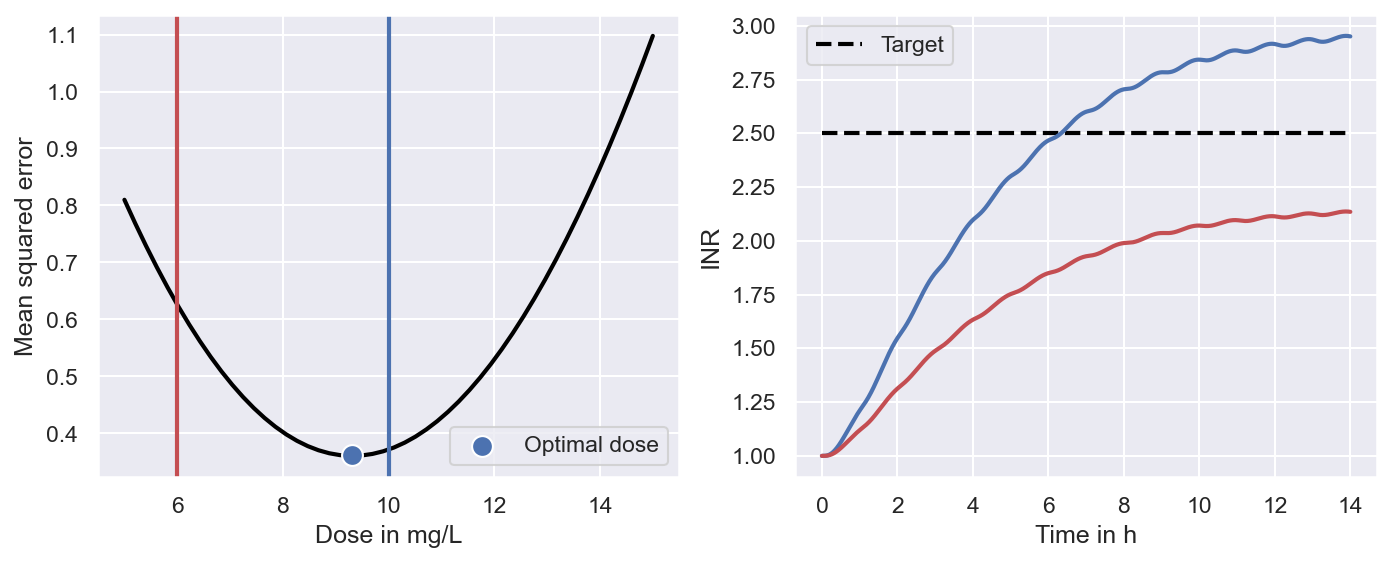

In [7]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, wspace=0.2)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(doses, mse, color='black', linewidth=2)
axes[0].axvline(x=dose1, color=sns.color_palette()[0], linewidth=2)
axes[0].axvline(x=dose2, color=sns.color_palette()[3], linewidth=2)

axes[1].plot(times/24, [target]*len(times), color='black', linestyle='--', linewidth=2, label='Target')
axes[1].plot(times/24, out1, color=sns.color_palette()[0], linewidth=2)
axes[1].plot(times/24, out2, color=sns.color_palette()[3], linewidth=2)

axes[0].scatter([9.3], [0.363], color=sns.color_palette()[0], label='Optimal dose', zorder=10, edgecolor='white', s=100)

axes[0].set_ylabel('Mean squared error')
axes[0].set_xlabel('Dose in mg/L')
axes[1].set_ylabel('INR')
axes[1].set_xlabel('Time in h')

axes[0].legend()
axes[1].legend()

plt.savefig('illustration_mse.pdf', bbox_inches='tight')
plt.show()

In [8]:
# Define model
model = chi.library.ModelLibrary().one_compartment_pk_model()
model.set_administration(compartment='central', direct=False)

In [9]:
dose

15.0

In [10]:
days = 3
times = np.linspace(0, days, num=500) * 24
model.set_dosing_regimen(dose=dose, period=24)

parameters1 = [0, 0, parameters[4], 2, parameters[0]]
out = model.simulate(parameters=parameters1, times=times)[0]

parameters2 = [0, 0, parameters[4], 0.8, 0.1]
out2 = model.simulate(parameters=parameters2, times=times)[0]

parameters3 = [0, 0, parameters[4], 0.5, parameters[0]*2]
out3 = model.simulate(parameters=parameters3, times=times)[0]

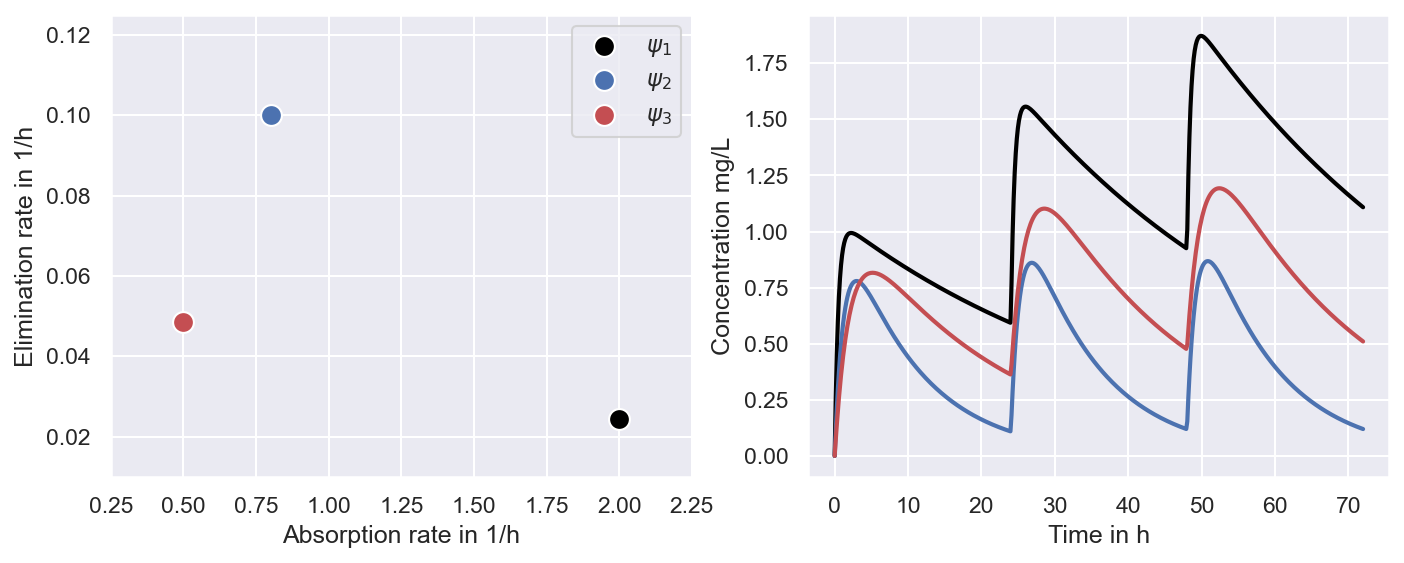

In [11]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, wspace=0.2)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].scatter([parameters1[3]], [parameters1[4]], color='black', edgecolor='white', s=100, label=r'$\psi _1$')
axes[0].scatter([parameters2[3]], [parameters2[4]], color=sns.color_palette()[0], edgecolor='white', s=100, label=r'$\psi _2$')
axes[0].scatter([parameters3[3]], [parameters3[4]], color=sns.color_palette()[3], edgecolor='white', s=100, label=r'$\psi _3$')

axes[1].plot(times, out, color='black', linewidth=2)
axes[1].plot(times, out2, color=sns.color_palette()[0], linewidth=2)
axes[1].plot(times, out3, color=sns.color_palette()[3], linewidth=2)

axes[0].set_ylabel('Elimination rate in 1/h')
axes[0].set_xlabel('Absorption rate in 1/h')
axes[0].set_xlim([0.25, 2.25])
axes[0].set_ylim([0.01, 0.125])
axes[1].set_ylabel('Concentration mg/L')
axes[1].set_xlabel('Time in h')

axes[0].legend()

plt.savefig('illustration_parameter_influence.pdf', bbox_inches='tight')
plt.show()

In [12]:
import pints

np.random.seed(2)
days = 3
times = np.linspace(0, days, num=500) * 24
model.set_dosing_regimen(dose=dose, period=24)

parameters3 = [0, 0, parameters[4], 0.5, parameters[0]*2]
out3 = model.simulate(parameters=parameters3, times=times)[0]

out = out3[1::10]
meas = out + np.random.normal(size=len(out), scale=0.1)
xs = np.linspace(-0.33, 0.33)
pdfs = np.exp([pints.GaussianLogPrior(0, 0.1)([x]) for x in xs])

res = meas - out

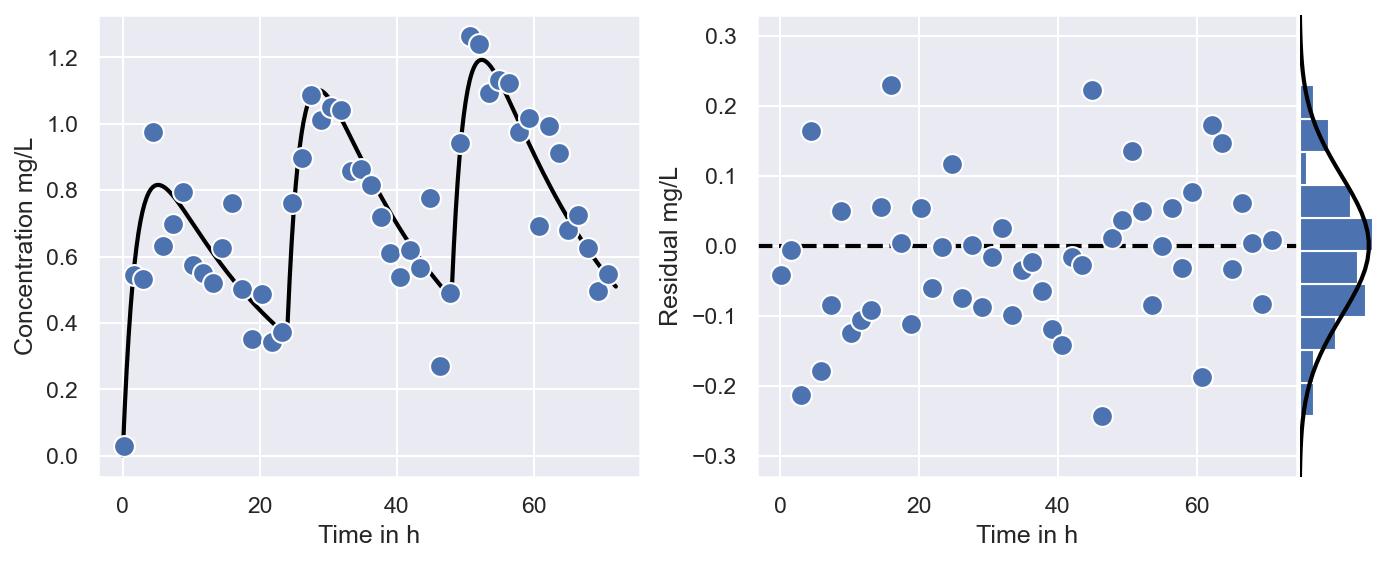

In [13]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, wspace=0.2, width_ratios=[7, 8])
inner = gridspec.GridSpecFromSubplotSpec(
    1, 2, subplot_spec=outer[1], wspace=0.01, width_ratios=[7, 1])

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, inner[0]))
axes.append(plt.Subplot(fig, inner[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(times, out3, color='black', linewidth=2)
axes[0].scatter(times[1::10], meas, color=sns.color_palette()[0], edgecolor='white', s=100, zorder=10)

axes[1].axhline(y=0, color='black', linewidth=2, linestyle='dashed')
axes[1].scatter(times[1::10], res, color=sns.color_palette()[0], edgecolor='white', s=100, zorder=10)

axes[2].hist(res, orientation='horizontal', density=True)
axes[2].plot(pdfs, xs, color='black', linewidth=2)

axes[0].set_ylabel('Concentration mg/L')
axes[0].set_xlabel('Time in h')
axes[1].set_ylabel('Residual mg/L')
axes[1].set_xlabel('Time in h')
axes[1].set_ylim([-0.33, 0.33])
axes[2].set_ylim([-0.33, 0.33])
axes[2].set_axis_off()

plt.savefig('illustration_measurement_model.pdf', bbox_inches='tight')
plt.show()

In [14]:
parameters1 = [0, 0, parameters[4], 0.5, parameters[0]*2.2]
parameters2 = [0, 0, parameters[4], 0.5, parameters[0]*1.5]
out1 = model.simulate(parameters=parameters1, times=times)[0]
out2 = model.simulate(parameters=parameters2, times=times)[0]

res1 = meas - out1[1::10]
res2 = meas - out2[1::10]

xs = np.linspace(-0.5, 0.5)
pdfs = np.exp([pints.GaussianLogPrior(0, 0.1)([x]) for x in xs])

# Define log-likelihood
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=times[1::10], observations=meas)
kes = np.linspace(1, 3) * parameters[0]
scores = [log_likelihood([0, 0, parameters[4], 0.5, ke, 0.1]) for ke in kes]

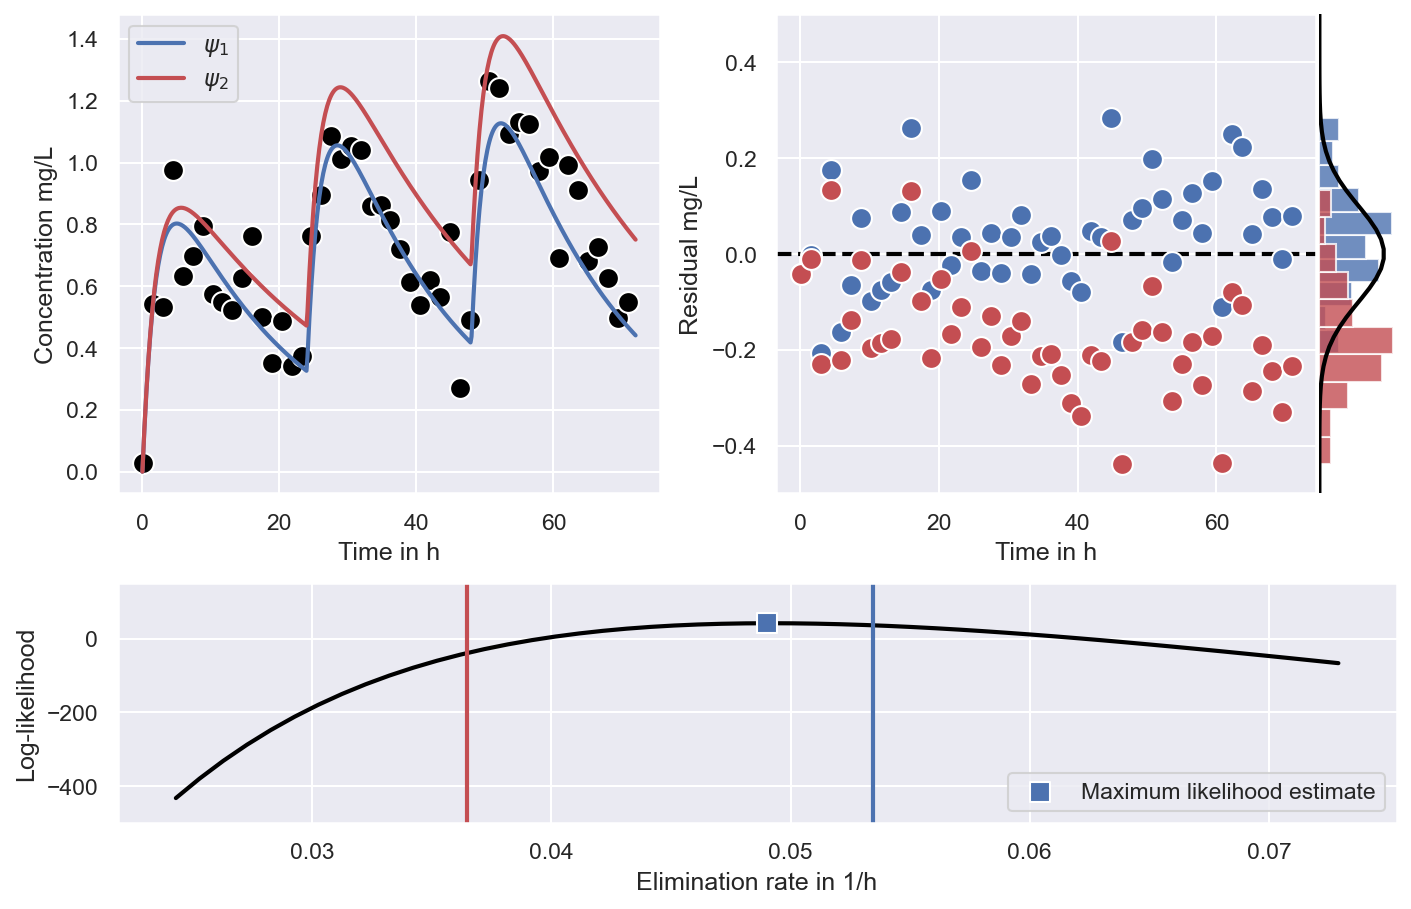

In [15]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 1350 // my_dpi), dpi=150)
outer0 = gridspec.GridSpec(2, 1, hspace=0.25, height_ratios=[2, 1])
outer = gridspec.GridSpecFromSubplotSpec(
    1, 2, subplot_spec=outer0[0], wspace=0.2, width_ratios=[7, 8])
inner = gridspec.GridSpecFromSubplotSpec(
    1, 2, subplot_spec=outer[1], wspace=0.01, width_ratios=[7, 1])

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, inner[0]))
axes.append(plt.Subplot(fig, inner[1]))
axes.append(plt.Subplot(fig, outer0[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].plot(times, out1, color=sns.color_palette()[0], linewidth=2, label=r'$\psi _1$')
axes[0].plot(times, out2, color=sns.color_palette()[3], linewidth=2, label=r'$\psi _2$')
axes[0].scatter(times[1::10], meas, color='black', edgecolor='white', s=100)

axes[1].axhline(y=0, color='black', linewidth=2, linestyle='dashed')
axes[1].scatter(times[1::10], res1, color=sns.color_palette()[0], edgecolor='white', s=100, zorder=10)
axes[1].scatter(times[1::10], res2, color=sns.color_palette()[3], edgecolor='white', s=100, zorder=10)

axes[2].hist(res1, orientation='horizontal', density=True, color=sns.color_palette()[0], alpha=0.8)
axes[2].hist(res2, orientation='horizontal', density=True, color=sns.color_palette()[3], alpha=0.8)
axes[2].plot(pdfs, xs, color='black', linewidth=2)

axes[3].plot(kes, scores, color='black', linewidth=2)
axes[3].axvline(x=parameters1[-1], color=sns.color_palette()[0], linewidth=2)
axes[3].axvline(x=parameters2[-1], color=sns.color_palette()[3], linewidth=2)
axes[3].scatter([0.049], [42], color=sns.color_palette()[0], label='Maximum likelihood estimate', zorder=10, edgecolor='white', s=100, marker='s')

axes[0].set_ylabel('Concentration mg/L')
axes[0].set_xlabel('Time in h')
axes[1].set_ylabel('Residual mg/L')
axes[1].set_xlabel('Time in h')
axes[1].set_ylim([-0.5, 0.5])
axes[2].set_ylim([-0.5, 0.5])
axes[2].set_axis_off()
axes[3].set_xlabel('Elimination rate in 1/h')
axes[3].set_ylabel('Log-likelihood')
axes[3].set_ylim([-500, 150])
axes[0].legend()
axes[3].legend()

plt.savefig('illustration_mle.pdf', bbox_inches='tight')
plt.show()

In [16]:
import myokit

np.random.seed(2)
days = 3
times = np.array([0.16, 0.24, 0.32, 0.72, 0.8, 0.88]) * 24
model.set_dosing_regimen(dose=dose, period=24)

parameters3 = [0, 0, parameters[4], 2, parameters[0]*2]
out = model.simulate(parameters=parameters3, times=times)[0]
meas = out + np.random.normal(size=len(out), scale=0.1)

# Infer model parameters
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=times[:3], observations=meas[:3])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'dose.drug_amount': 0,
    'dose.absorption_rate': 2,
    'Sigma': 0.1
})
estimates1, _ = pints.optimise(function=log_likelihood, x0=[10, 1])

log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=times, observations=meas)
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'dose.drug_amount': 0,
    'dose.absorption_rate': 2,
    'Sigma': 0.1
})
estimates2, _ = pints.optimise(function=log_likelihood, x0=[15, 1])

# For prediction
days = 3
duration = 0.01
regimen = myokit.Protocol()
for day, do in enumerate([dose, 3*dose, 3*dose]):
    if do == 0:
        continue
    regimen.add(myokit.ProtocolEvent(
        level=do/duration,
        start=day*24,
        duration=duration))

times2 = np.linspace(0, days, num=1000) * 24
model.set_dosing_regimen(regimen)
out1 = model.simulate(parameters=parameters3, times=times2)[0]
out2 = model.simulate(parameters=[0, 0, estimates1[0], 2, estimates1[1]], times=times2)[0]
out3 = model.simulate(parameters=[0, 0, estimates2[0], 2, estimates2[1]], times=times2)[0]


Maximising LogPDF
Using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Current   Time m:s
0     6     -16.92311 -16.92311   0:00.1
1     12    -4.194339 -4.194339   0:00.1
2     18    -4.194339 -14.68519   0:00.1
3     24    -4.194339 -55.61131   0:00.1
20    126    3.26344   3.26344    0:00.1
40    246    3.539436  3.537526   0:00.1
60    366    3.53948   3.539478   0:00.1
80    486    3.53948   3.53948    0:00.1
100   606    3.53948   3.53948    0:00.1
120   726    3.53948   3.53948    0:00.2
140   846    3.53948   3.53948    0:00.2
160   966    3.53948   3.53948    0:00.2
180   1086   3.53948   3.53948    0:00.2
200   1206   3.53948   3.53948    0:00.2
220   1326   3.53948   3.53948    0:00.2
240   1446   3.53948   3.53948    0:00.3
260   1566   3.53948   3.53948    0:00.3
279   1674   3.53948   3.53948    0:00.3
Halting: No significant change for 200 iterations.
Maximising LogPDF
Using Covariance Matrix 

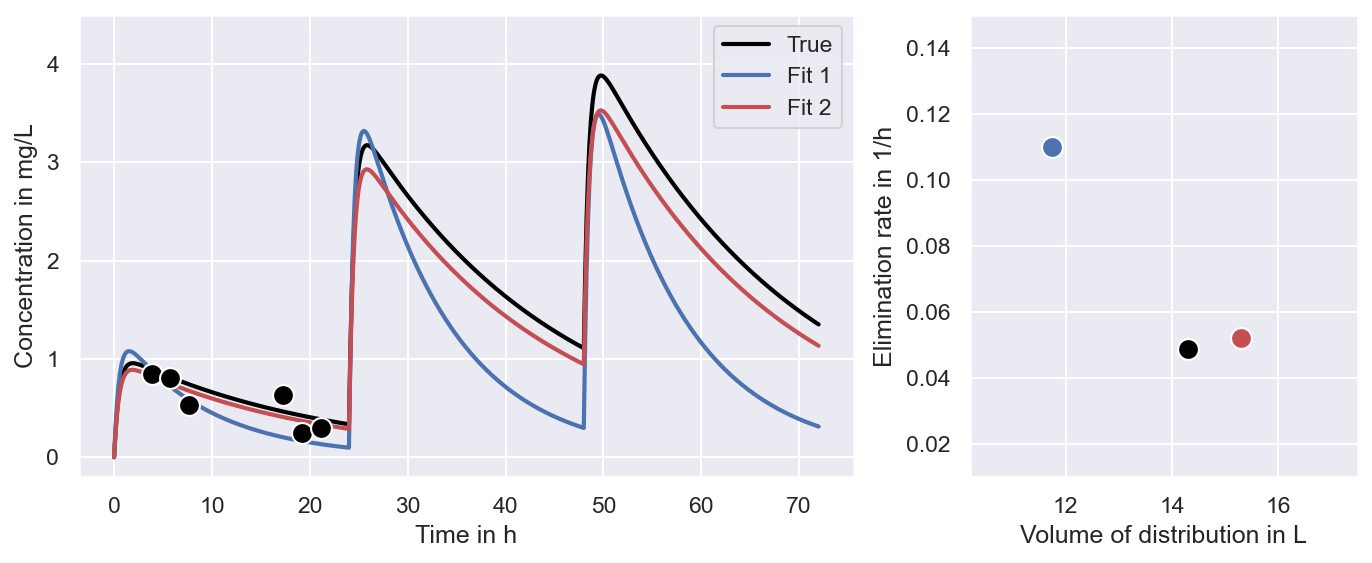

In [17]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].scatter(times, meas, color='black', edgecolor='white', s=100, zorder=100)

axes[1].scatter([parameters3[2]], [parameters3[4]], color='black', edgecolor='white', s=100)
axes[1].scatter([estimates1[0]], [estimates1[1]], color=sns.color_palette()[0], edgecolor='white', s=100)
axes[1].scatter([estimates2[0]], [estimates2[1]], color=sns.color_palette()[3], edgecolor='white', s=100)

axes[0].plot(times2, out1, color='black', linewidth=2, label='True')
axes[0].plot(times2, out2, color=sns.color_palette()[0], linewidth=2, label='Fit 1')
axes[0].plot(times2, out3, color=sns.color_palette()[3], linewidth=2, label='Fit 2')

axes[1].set_xlabel('Volume of distribution in L')
axes[1].set_ylabel('Elimination rate in 1/h')
axes[0].set_ylim([-0.2, 4.5])
axes[1].set_ylim([0.01, 0.15])
axes[1].set_xlim([10.2, 17.5])
axes[0].set_ylabel('Concentration in mg/L')
axes[0].set_xlabel('Time in h')
axes[0].legend()

plt.savefig('illustration_parametric_uncertainty.pdf', bbox_inches='tight')
plt.show()

In [19]:
# Infer model parameters
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=times[:3], observations=meas[:3])
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'dose.drug_amount': 0,
    'dose.absorption_rate': 2,
    'Sigma': 0.1
})
log_posterior = chi.LogPosterior(log_likelihood, pints.ComposedLogPrior(pints.GaussianLogPrior(14.3, 2), pints.GaussianLogPrior(0.5, 0.1)))
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior1 = controller.run(10000, log_to_screen=True)

log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=times, observations=meas)
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'dose.drug_amount': 0,
    'dose.absorption_rate': 2,
    'Sigma': 0.1
})
log_posterior = chi.LogPosterior(log_likelihood, pints.ComposedLogPrior(pints.GaussianLogPrior(14.3, 2), pints.GaussianLogPrior(0.5, 0.1)))
controller = chi.SamplingController(log_posterior)
controller.set_parallel_evaluation(False)
controller.set_n_runs(n_runs=3)
posterior2 = controller.run(10000, log_to_screen=True)

estimates3 = np.vstack([
    posterior1['central.size'].sel(draw=slice(5000, 10000, 10)).values.flatten(),
    posterior1['global.elimination_rate'].sel(draw=slice(5000, 10000, 10)).values.flatten()]).T

estimates4 = np.vstack([
    posterior2['central.size'].sel(draw=slice(5000, 10000, 10)).values.flatten(),
    posterior2['global.elimination_rate'].sel(draw=slice(5000, 10000, 10)).values.flatten()]).T

# For prediction
days = 3
duration = 0.01
regimen = myokit.Protocol()
for day, do in enumerate([dose, 3*dose, 3*dose]):
    if do == 0:
        continue
    regimen.add(myokit.ProtocolEvent(
        level=do/duration,
        start=day*24,
        duration=duration))

times2 = np.linspace(0, days, num=1000) * 24
model.set_dosing_regimen(regimen)
out1 = model.simulate(parameters=parameters3, times=times2)[0]

# Simulate posterior predictive
out4 = np.empty(shape=(len(estimates3), len(times2)))
out5 = np.empty(shape=(len(estimates4), len(times2)))
for ids in range(len(estimates3)):
    out4[ids] = model.simulate(parameters=[0, 0, estimates3[ids, 0], 2, estimates3[ids, 1]], times=times2)[0]
    out5[ids] = model.simulate(parameters=[0, 0, estimates4[ids, 0], 2, estimates4[ids, 1]], times=times2)[0]


Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.5       0.5       0          0:00.0
2     9      0.333     0.667     0.333      0:00.0
3     12     0.5       0.5       0.5        0:00.0
20    63     0.476     0.619     0.476      0:00.0
40    123    0.39      0.415     0.366      0:00.0
60    183    0.311     0.328     0.295082   0:00.0
80    243    0.259     0.345679  0.296      0:00.0
100   303    0.297     0.347     0.267      0:00.0
120   363    0.314     0.364     0.264      0:00.1
140   423    0.305     0.362     0.277      0:00.1
160   483    0.348     0.348     0.286      0:00.1
180   543    0.343     0.354     0.271      0:00.1
Initial phase completed.
200   603    0.323     0.338     0.259      0:00.1
220   663    0.335     0.357     0.271      0:00.1
240   723    0.369     0.369     0.303      0:00.1
260   783   

array([[<Axes: title={'center': 'central.size'}>,
        <Axes: title={'center': 'central.size'}>],
       [<Axes: title={'center': 'global.elimination_rate'}>,
        <Axes: title={'center': 'global.elimination_rate'}>]],
      dtype=object)

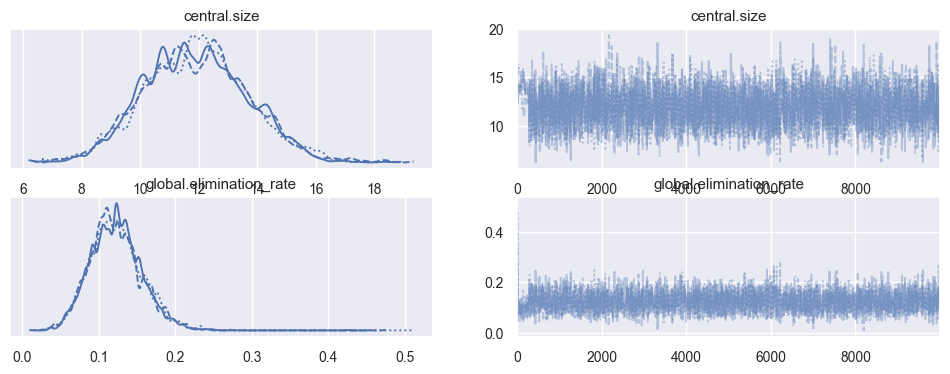

In [20]:
import arviz as az

az.plot_trace(posterior1)

array([[<Axes: title={'center': 'central.size'}>,
        <Axes: title={'center': 'central.size'}>],
       [<Axes: title={'center': 'global.elimination_rate'}>,
        <Axes: title={'center': 'global.elimination_rate'}>]],
      dtype=object)

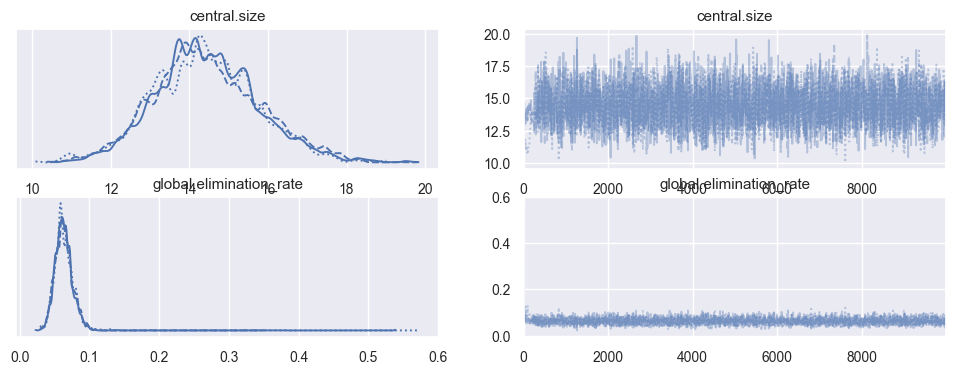

In [21]:
az.plot_trace(posterior2)

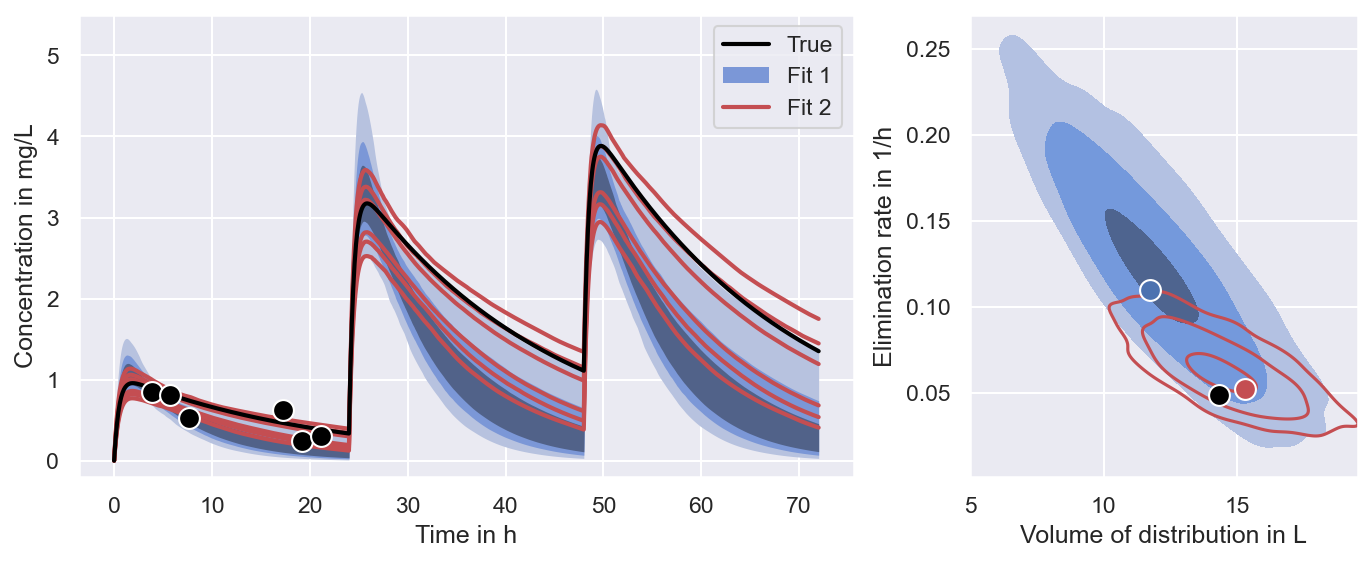

In [22]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

axes[0].scatter(times, meas, color='black', edgecolor='white', s=100, zorder=100)

axes[1].scatter([parameters3[2]], [parameters3[4]], color='black', edgecolor='white', s=100, zorder=100)
axes[1].scatter([estimates1[0]], [estimates1[1]], color=sns.color_palette()[0], edgecolor='white', s=100, zorder=100)
axes[1].scatter([estimates2[0]], [estimates2[1]], color=sns.color_palette()[3], edgecolor='white', s=100, zorder=100)
sns.kdeplot(x=estimates3[:, 0], y=estimates3[:, 1], color=sns.color_palette()[0], ax=axes[1], fill=True, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5)
sns.kdeplot(x=estimates4[:, 0], y=estimates4[:, 1], color=sns.color_palette()[3], ax=axes[1], fill=False, levels=[0.01, 0.1, 0.67, 1], bw_adjust=1.5)

axes[0].plot(times2, out1, color='black', linewidth=2, label='True', zorder=99)
axes[0].fill_between(times2, np.percentile(out4, 0.5, axis=0), np.percentile(out4, 99.5, axis=0), color='#B7C2DF', linewidth=0)
axes[0].fill_between(times2, np.percentile(out4, 5, axis=0), np.percentile(out4, 95, axis=0), color='#7B97D7', linewidth=0, label='Fit 1')
axes[0].fill_between(times2, np.percentile(out4, 33.3/2, axis=0), np.percentile(out4, 100-33.3/2, axis=0), color='#516289', linewidth=0)
axes[0].plot(times2, np.percentile(out5, 0.5, axis=0), color=sns.color_palette()[3], linewidth=2, label='Fit 2')
axes[0].plot(times2, np.percentile(out5, 5, axis=0), color=sns.color_palette()[3], linewidth=2)
axes[0].plot(times2, np.percentile(out5, 33.3/2, axis=0), color=sns.color_palette()[3], linewidth=2)
axes[0].plot(times2, np.percentile(out5, 100-33.3/2, axis=0), color=sns.color_palette()[3], linewidth=2)
axes[0].plot(times2, np.percentile(out5, 95, axis=0), color=sns.color_palette()[3], linewidth=2)
axes[0].plot(times2, np.percentile(out5, 99.5, axis=0), color=sns.color_palette()[3], linewidth=2)

axes[1].set_xlabel('Volume of distribution in L')
axes[1].set_ylabel('Elimination rate in 1/h')
axes[0].set_ylim([-0.2, 5.5])
axes[1].set_ylim([0.001, 0.27])
axes[1].set_xlim([5, 19.5])
axes[0].set_ylabel('Concentration in mg/L')
axes[0].set_xlabel('Time in h')
axes[0].legend()

plt.savefig('illustration_parametric_uncertainty2.pdf', bbox_inches='tight')
plt.show()

Visualise MCMC

In [23]:
log_likelihood = chi.LogLikelihood(mechanistic_model=model, error_model=chi.GaussianErrorModel(), times=times, observations=meas)
log_likelihood.fix_parameters({
    'central.drug_amount': 0,
    'dose.drug_amount': 0,
    'dose.absorption_rate': 2,
    'central.size': 14.3,
    'Sigma': 0.1
})
log_prior = pints.GaussianLogPrior(0.5, 0.1)
log_posterior = chi.LogPosterior(log_likelihood, log_prior)

In [24]:
np.random.seed(3)
n_traces = 1000
n_iterations = 201
initial_points = log_prior.sample(n=n_traces)
traces = np.empty(shape=(n_traces, n_iterations))
for idt in range(n_traces):
    method = pints.MetropolisRandomWalkMCMC(x0=[initial_points[idt]], sigma0=0.002)
    for idi in range(n_iterations):
        sample = method.ask()
        f = log_posterior(sample)
        sample, _, isAccepted = method.tell(f)
        if isAccepted or (idi == 0):
            traces[idt, idi] = sample[0]
        else:
            traces[idt, idi] = traces[idt, idi-1]

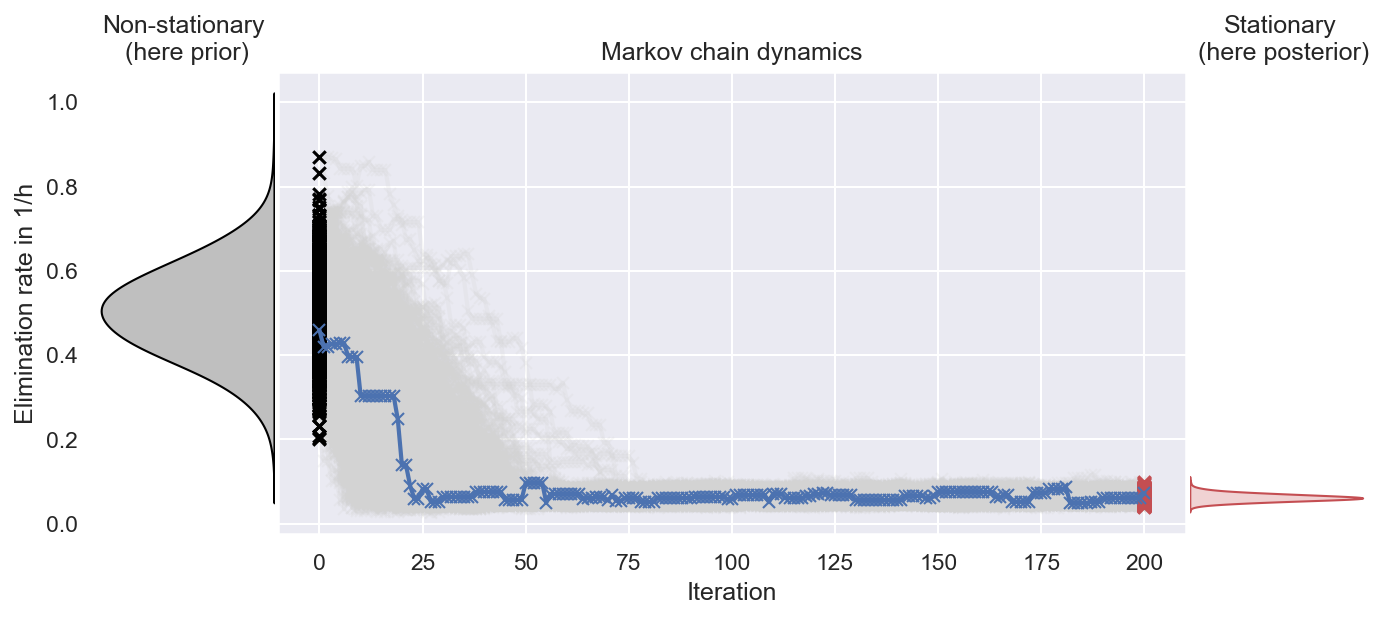

In [25]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 3, width_ratios=[1, 5, 1], wspace=0.01)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[0]))
axes.append(plt.Subplot(fig, outer[1]))
axes.append(plt.Subplot(fig, outer[2]))

axes[0].sharey(axes[1])
axes[1].sharey(axes[2])

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

# Plot traces
iterations = np.arange(n_iterations)
for trace in traces:
    axes[1].plot(
        iterations, trace, color='lightgrey', marker='x', linewidth=2, alpha=0.2)
axes[1].plot(
    iterations, traces[15], color=sns.color_palette()[0], marker='x', linewidth=2, zorder=11)
axes[1].scatter(
    [0]*n_traces, traces[:, 0], color='black', marker='x', zorder=10)
axes[1].scatter(
    [200]*n_traces, traces[:, -1], color=sns.color_palette()[3], marker='x', zorder=10)

sns.kdeplot(y=traces[:, 0], color='black', ax=axes[0], bw_adjust=2, fill=True)
sns.kdeplot(y=traces[:, -1], color=sns.color_palette()[3], ax=axes[2], bw_adjust=2, fill=True)

axes[0].invert_xaxis()
axes[1].tick_params(axis='y', pad=90)
axes[1].set_ylabel('Elimination rate in 1/h')
axes[1].set_xlabel('Iteration')
axes[0].set_axis_off()
axes[2].set_axis_off()
axes[0].set_title('Non-stationary\n (here prior)')
axes[1].set_title('Markov chain dynamics')
axes[2].set_title('Stationary\n (here posterior)')

plt.savefig('illustration_mcmc.png', bbox_inches='tight')
plt.savefig('illustration_mcmc.pdf', bbox_inches='tight')
plt.show()

In [34]:
np.random.seed(3)
n_traces = 4
n_iterations = 800
initial_points = [0.2, 0.2, 0.2, 0.2]
sigmas = [1E-5, 1E-4, 1E-3, 1E-2]
traces = np.empty(shape=(n_traces, n_iterations))
for idt in range(n_traces):
    method = pints.MetropolisRandomWalkMCMC(x0=[initial_points[idt]], sigma0=sigmas[idt])
    for idi in range(n_iterations):
        sample = method.ask()
        f = log_posterior(sample)
        sample, _, isAccepted = method.tell(f)
        if isAccepted or (idi == 0):
            traces[idt, idi] = sample[0]
        else:
            traces[idt, idi] = traces[idt, idi-1]

random_draw = np.random.normal(loc=np.mean(traces[1, 100:]), scale=np.std(traces[1, 100:], ddof=1), size=800)

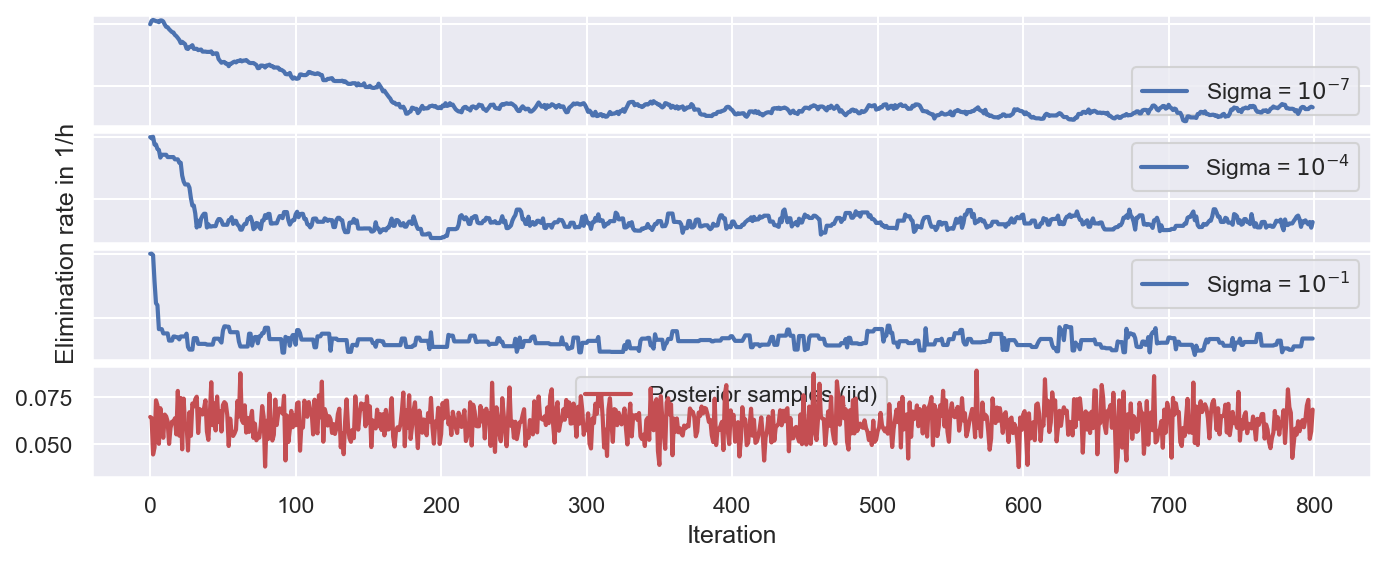

In [35]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(4, 1, hspace=0.05)

# Create axes for marginal posteriors
axes = []
for i in range(4):
    axes.append(plt.Subplot(fig, outer[i]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)


axes[0].plot(
    np.arange(0, 800), traces[0], color=sns.color_palette()[0], zorder=10, linewidth=2, label=r'Sigma = $10^{-7}$')
axes[1].plot(
    np.arange(0, 800), traces[1], color=sns.color_palette()[0], zorder=10, linewidth=2, label=r'Sigma = $10^{-4}$')
axes[2].plot(
    np.arange(0, 800), traces[2], color=sns.color_palette()[0], zorder=10, linewidth=2, label=r'Sigma = $10^{-1}$')
axes[3].plot(
    np.arange(0, 800), random_draw, color=sns.color_palette()[3], zorder=10, linewidth=2, label='Posterior samples (iid)')

axes[1].set_ylabel('Elimination rate in 1/h')
axes[1].yaxis.set_label_coords(x=-0.01, y=0)
axes[3].set_xlabel('Iteration')
axes[0].xaxis.set_ticklabels([])
axes[1].xaxis.set_ticklabels([])
axes[0].yaxis.set_ticklabels([])
axes[1].yaxis.set_ticklabels([])
axes[2].yaxis.set_ticklabels([])
axes[0].legend(loc='lower right')
axes[1].legend()
axes[2].legend()
axes[3].legend()

plt.savefig('illustration_inset.png', bbox_inches='tight')

plt.show()

Visualise population model for varying ke and v parameters.

In [36]:
model2 = chi.library.ModelLibrary().one_compartment_pk_model()
model2.set_administration(compartment='central', direct=False)
model2 = chi.ReducedMechanisticModel(model2)
model2.fix_parameters({
    'central.drug_amount': 0.001,
    'dose.drug_amount': 0.001,
    'dose.absorption_rate': 2
})
population_model = chi.LogNormalModel(n_dim=2)
pop_parameters = [np.exp(-1.7), np.exp(2.7), 0.1, 0.1]

/var/folders/v4/97p50d2s59d8tf5xm5h27fjh0000gp/T/ipykernel_14972/72184441.py:4: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  model2.fix_parameters({


In [43]:
# Sample indiviudals
n_samples = 1000
pop_parameters = [2.6, -3.7, 0.1, 0.1]
sampled_parameters = population_model.sample(parameters=pop_parameters, n_samples=n_samples, seed=9)

# Simulate treament responses
n_times = 200
times = np.linspace(0, 72, n_times)
out = np.empty(shape=(n_samples, n_times))
model2.set_dosing_regimen(dose=22, period=24)
for idp, p in enumerate(sampled_parameters):
    out[idp] = model2.simulate(p, times)[0]

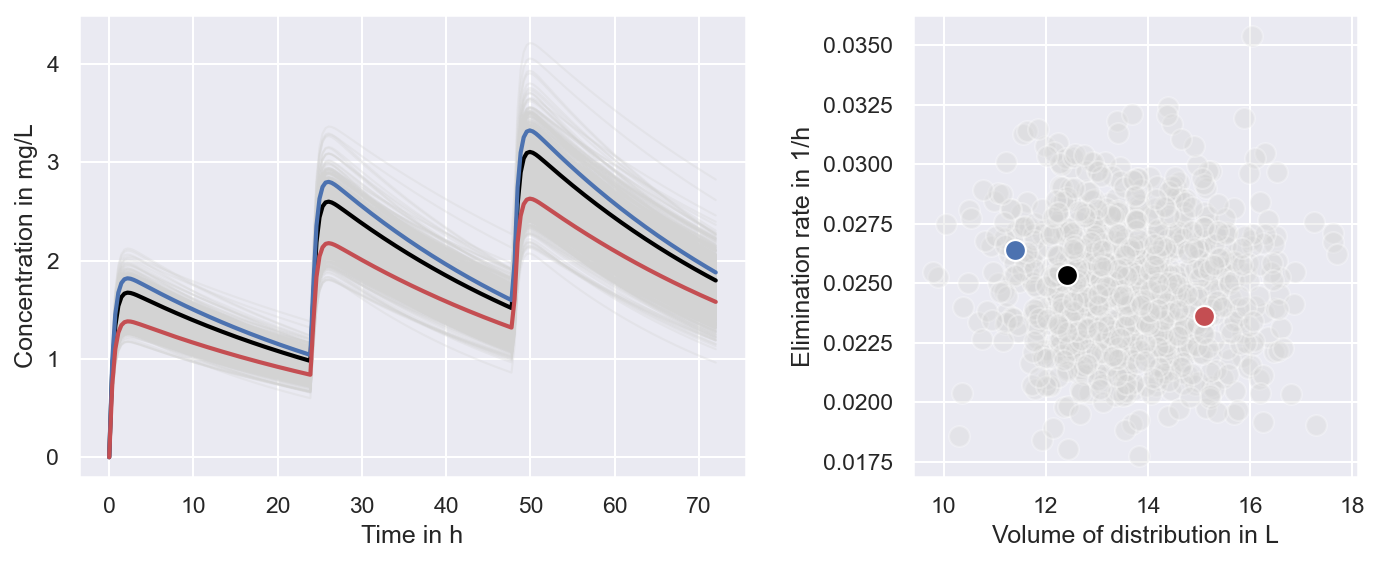

In [46]:
# Create layout
fontsize = 14
my_dpi = 192
fig = plt.figure(figsize=(2250 // my_dpi, 900 // my_dpi), dpi=150)
outer = gridspec.GridSpec(1, 2, width_ratios=[3, 2], wspace=0.3)

# Create axes for marginal posteriors
axes = []
axes.append(plt.Subplot(fig, outer[1]))
axes.append(plt.Subplot(fig, outer[0]))

# Add axes to figure
for ax in axes:
    fig.add_subplot(ax)

for p in sampled_parameters:
    axes[0].scatter([p[0]], [p[1]], color='lightgrey', edgecolor='white', s=100, alpha=0.3)

axes[0].scatter([sampled_parameters[0, 0]], [sampled_parameters[0, 1]], color='black', edgecolor='white', s=100)
axes[0].scatter([sampled_parameters[1, 0]], [sampled_parameters[1, 1]], color=sns.color_palette()[0], edgecolor='white', s=100)
axes[0].scatter([sampled_parameters[2, 0]], [sampled_parameters[2, 1]], color=sns.color_palette()[3], edgecolor='white', s=100)

for o in out:
    axes[1].plot(times, o, color='lightgrey', linewidth=1, alpha=0.3)

axes[1].plot(times, out[0], color='black', linewidth=2, label='ID 1')
axes[1].plot(times, out[1], color=sns.color_palette()[0], linewidth=2, label='ID 2')
axes[1].plot(times, out[2], color=sns.color_palette()[3], linewidth=2, label='ID 3')

axes[0].set_xlabel('Volume of distribution in L')
axes[0].set_ylabel('Elimination rate in 1/h')
axes[1].set_ylim([-0.2, 4.5])
# axes[1].set_ylim([0.01, 0.15])
# axes[1].set_xlim([10.2, 17.5])
axes[1].set_ylabel('Concentration in mg/L')
axes[1].set_xlabel('Time in h')

plt.savefig('illustration_parametric_uncertainty.png', bbox_inches='tight')
plt.show()

This shows that a good prior for MIPD is the variability of the model parameters. To make use of this variability, we can formulate a model of the inter-individual variability. Here, this model may be to assume that the volume of distribution is normally distributed in the population and that the elimination rate is normally distirbuted
$$
p(\psi / \theta ) = \mathcal{N}(k_e / \mu _{k_e}, \sigma ^2_{k_e}) \mathcal{N}(v / \mu _{v}, \sigma ^2_{v}).
$$

If we knew the parameters across individuals, the estimation of the population model parameters would follow analogously to the parameter estimation that we discussed in sections.... The only difference is that the data for the parameter estimation would not be treatment response measurements, but the model parameters of the individuals, $\psi$. Let us denote the parameters across $N$ individuals by $\Psi = (\psi_1, \psi _2, \ldots, \psi_N)$. Then the log-likelihood of the population model parameters under the population model is given by
$$
    \log p(\Psi / \theta ) = \sum _{n=1}^N \log p(\psi_n / \theta ).
$$
Note that this definition of the likelihood is in complete analogy. Similarly to the limited number of measurements, also a limited number of individuals induces uncertainty into the population-level estimates. 

In practice, we don't know the parameters of indiviudals, of course. Instead, we need to infer them from measurements - measurements collected, for example, during clinical trials. So, how can we extend the above inference scheme when the data is uncertain?

-> hierarchical inference

$$
p(y, \psi / \theta, t, r) = p(y / \psi, t, r) \, p(\psi / \theta ).
$$

$$
\log p(\mathcal{D}, \Psi / \theta) = \sum _{n=1}^N \log p(\mathcal{D}_n / \psi _n) + \sum _{n=1}^N \log p(\psi_n / \theta ).
$$

$$
\log p(\theta, \Psi / \mathcal{D}) = \sum _{n=1}^N \log p(\mathcal{D}_n / \psi _n) + \sum _{n=1}^N \log p(\psi_n / \theta ) + \log p(\theta) - \log p(\mathcal{D}).
$$

Let's say we do inference on each individual separately with some prior $p(\psi)$. For simplicity, the prior is the same across all inferences. Can we obtain the same / similar posterior for the population model parmaeters?

$$
\log p(\psi _n / \mathcal{D}_n) = \log p(\mathcal{D}_n / \psi _n) + \log p(\psi _n) - \log p(D_n)
$$

In [303]:
o.shape

NameError: name 'o' is not defined